# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('demo01.csv')
print(df.head())
#df.info()
df.dtypes
#df.isna().sum()
#df['mau'].unique()

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [68]:
df['qtd_categorias'] = np.nan
lista = []
for i in df.columns:
    atual = df[i].nunique()
    lista.append(atual)



#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [88]:
df_encoded = pd.get_dummies(df, columns = ['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','tipo_residencia'],drop_first=True)
df_encoded.head(20)
df_encoded.dtypes
#df_dummy.sexo = df_encoded.sexo.map({'F': 1, 'M':0})

qtd_filhos                               int64
educacao                                object
estado_civil                            object
idade                                  float64
tempo_emprego                          float64
possui_celular                           int64
possui_fone_comercial                    int64
possui_fone                              int64
possui_email                             int64
qt_pessoas_residencia                  float64
mau                                       bool
sexo_M                                    bool
posse_de_veiculo_Y                        bool
posse_de_imovel_Y                         bool
tipo_renda_Pensioner                      bool
tipo_renda_State servant                  bool
tipo_renda_Student                        bool
tipo_renda_Working                        bool
tipo_residencia_House / apartment         bool
tipo_residencia_Municipal apartment       bool
tipo_residencia_Office apartment          bool
tipo_residenc

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

<Axes: xlabel='possui_email'>

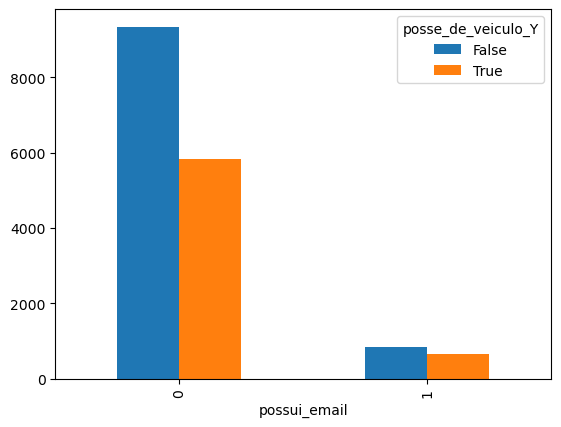

In [98]:
probabilidade = pd.crosstab(df_encoded['possui_email'],df_encoded['posse_de_veiculo_Y'])
probabilidade.plot.bar()

#A mais poderosa é a variável 'possui_email'

#### 5) Salve a base, pois ela será utilizada no final deste módulo.